## Import Libraries
---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Cleaning
---

In [2]:
# load the file

import pandas as pd

df = pd.read_csv("./data/APAC Data Analytics Case Study.csv", index_col=0)

In [3]:
df.shape

(226868, 18)

In [4]:
pd.set_option('display.max_rows', 2000)

In [5]:
df.isnull().sum()

pspreference           0
currencycode           0
issuercountrycode    232
bin                    0
creationdate           0
genericresponse        0
amount                 0
scheme                 0
merchant               0
company                0
acquireraccount        0
acquirer               0
journaltype            0
paymentmethod          0
approved               0
refused                0
received               0
threedattempt          0
dtype: int64

In [6]:
df['issuercountrycode'].fillna('NA', inplace=True)

In [7]:
df.isnull().sum()

pspreference         0
currencycode         0
issuercountrycode    0
bin                  0
creationdate         0
genericresponse      0
amount               0
scheme               0
merchant             0
company              0
acquireraccount      0
acquirer             0
journaltype          0
paymentmethod        0
approved             0
refused              0
received             0
threedattempt        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226868 entries, 1 to 226868
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pspreference       226868 non-null  object 
 1   currencycode       226868 non-null  object 
 2   issuercountrycode  226868 non-null  object 
 3   bin                226868 non-null  int64  
 4   creationdate       226868 non-null  object 
 5   genericresponse    226868 non-null  object 
 6   amount             226868 non-null  float64
 7   scheme             226868 non-null  object 
 8   merchant           226868 non-null  object 
 9   company            226868 non-null  object 
 10  acquireraccount    226868 non-null  object 
 11  acquirer           226868 non-null  object 
 12  journaltype        226868 non-null  object 
 13  paymentmethod      226868 non-null  object 
 14  approved           226868 non-null  int64  
 15  refused            226868 non-null  int64  
 16  re

#### pspreference

In [9]:
# replace 'psp:' with ''
df['pspreference'].replace(to_replace=r'[psp:]', value='', regex=True, inplace=True)

In [10]:
# convert dtype to intx
df['pspreference'] = df['pspreference'].astype(np.float64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226868 entries, 1 to 226868
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pspreference       226868 non-null  float64
 1   currencycode       226868 non-null  object 
 2   issuercountrycode  226868 non-null  object 
 3   bin                226868 non-null  int64  
 4   creationdate       226868 non-null  object 
 5   genericresponse    226868 non-null  object 
 6   amount             226868 non-null  float64
 7   scheme             226868 non-null  object 
 8   merchant           226868 non-null  object 
 9   company            226868 non-null  object 
 10  acquireraccount    226868 non-null  object 
 11  acquirer           226868 non-null  object 
 12  journaltype        226868 non-null  object 
 13  paymentmethod      226868 non-null  object 
 14  approved           226868 non-null  int64  
 15  refused            226868 non-null  int64  
 16  re

#### Split 'creationdate' into 'year', 'month', 'day', 'hour', 'day of the week'

In [12]:
df['creationdate'] = pd.to_datetime(df['creationdate'])

In [13]:
df['year'] = df['creationdate'].dt.year
df['year'].head()

1    2017
2    2017
3    2017
4    2017
5    2017
Name: year, dtype: int64

In [14]:
df['month'] = df['creationdate'].dt.month
df['month'].head()

1    10
2    10
3    10
4    10
5    10
Name: month, dtype: int64

In [15]:
df['day'] = df['creationdate'].dt.day
df['day'].head()

1    1
2    1
3    1
4    1
5    1
Name: day, dtype: int64

In [16]:
df['hour'] = df['creationdate'].dt.hour
df['hour'].head()

1    18
2    12
3    22
4    22
5    21
Name: hour, dtype: int64

In [17]:
df['day_of_week'] = df['creationdate'].dt.weekday
df['day_of_week'].head()

1    6
2    6
3    6
4    6
5    6
Name: day_of_week, dtype: int64

In [18]:
# drop 'year' and 'month' as it contains only one value
df.drop(columns=['year','month'], inplace = True)

In [19]:
df.head()

,pspreference,currencycode,issuercountrycode,bin,creationdate,genericresponse,amount,scheme,merchant,company,...,acquirer,journaltype,paymentmethod,approved,refused,received,threedattempt,day,hour,day_of_week
1,8.906806e+16,IDR,ID,552695,2017-10-01 18:58:11,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,...,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,1,Yes,1,18,6
2,6.702506e+16,IDR,ID,547582,2017-10-01 12:47:47,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,...,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,1,Yes,1,12,6
3,6.136210e+16,IDR,ID,547582,2017-10-01 22:44:06,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,...,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes,1,22,6
4,7.848627e+16,IDR,ID,547582,2017-10-01 22:41:30,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,...,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes,1,22,6
5,6.116165e+15,IDR,KR,558420,2017-10-01 21:56:04,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,...,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes,1,21,6


## Exploratory Data Analysis
---

### Split Data First to Prevent Overspill

In [20]:
# split df into train/test sets

df_train, df_test = train_test_split(df,
                               test_size = 0.2,
                               random_state = 42
                              )

In [21]:
df_train.shape

(181494, 21)

In [22]:
df_test.shape

(45374, 21)

---

**Total Number of Transaction**

In [23]:
total_txn = df_train['pspreference'].count()
total_txn

181494

**% of Each Generic Response Category**

In [24]:
gr = pd.DataFrame(df_train['genericresponse'].value_counts()/total_txn*100, index=None)
gr.reset_index(inplace=True)
gr.rename(columns = {'index': 'genericresponse', 'genericresponse': '%'}, 
          inplace = True)
gr.head()

,genericresponse,%
0,APPROVED,88.246443
1,FRAUD,7.989796
2,DECLINED,2.982468
3,NOT_3D_AUTHENTICATED,0.423154
4,CVC_DECLINED,0.112400


C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


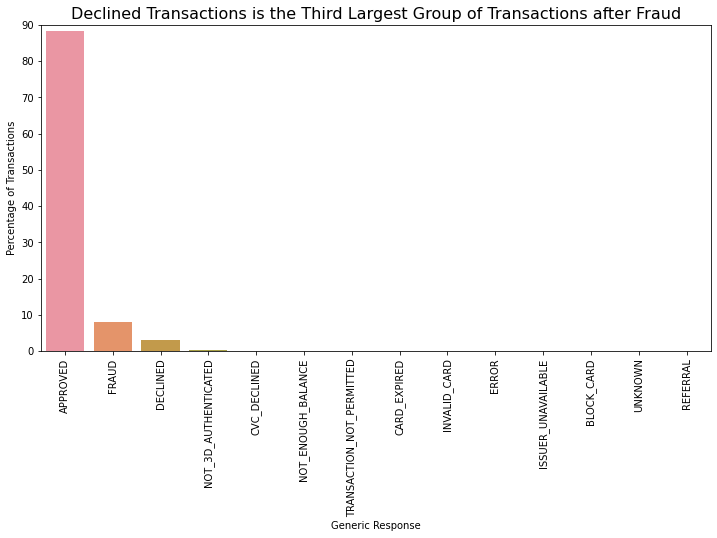

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(gr['genericresponse'], gr['%'])
ax.set_title('Declined Transactions is the Third Largest Group of Transactions after Fraud', size = 16)
ax.set_xlabel('Generic Response')
ax.set_ylabel('Percentage of Transactions')
ax.set_ylim(0, 90)
plt.xticks(rotation=90)
plt.show()

**Currency Code**

In [26]:
cc = pd.DataFrame(df_train.groupby('genericresponse')['currencycode'].value_counts()/total_txn*100)
cc.rename(columns = {'currencycode': '%'},inplace = True)
cc.reset_index(level=['genericresponse','currencycode'],inplace = True)

C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


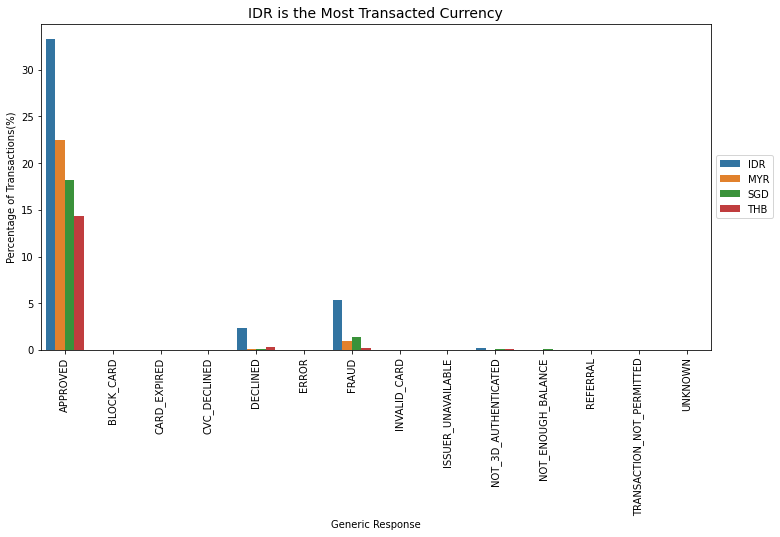

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(cc['genericresponse'], cc['%'], hue=cc['currencycode'])
ax.set_title('IDR is the Most Transacted Currency', size = 14)
ax.set_xlabel('Generic Response')
ax.set_ylabel('Percentage of Transactions(%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()

In [28]:
# onehot genericresponse
df_train1 = pd.get_dummies(df_train, columns=['genericresponse'])
df_train1.head()

,pspreference,currencycode,issuercountrycode,bin,creationdate,amount,scheme,merchant,company,acquireraccount,...,genericresponse_DECLINED,genericresponse_ERROR,genericresponse_FRAUD,genericresponse_INVALID_CARD,genericresponse_ISSUER_UNAVAILABLE,genericresponse_NOT_3D_AUTHENTICATED,genericresponse_NOT_ENOUGH_BALANCE,genericresponse_REFERRAL,genericresponse_TRANSACTION_NOT_PERMITTED,genericresponse_UNKNOWN
53200,4.647763e+16,SGD,SG,418238,2017-10-08 22:45:17,2000.0,visa,ABC_SGD,ABCLimited,AdyenVisaSingapore_ABC_SGD,...,0,0,0,0,0,0,0,0,0,0
10275,1.883133e+16,IDR,ID,421920,2017-10-02 16:19:02,20000.0,visa,DEF_IDR,DEFLimited,AdyenVisaEurope_DEF_IDR,...,0,0,0,0,0,0,0,0,0,0
79302,9.397116e+16,IDR,ID,524261,2017-10-12 23:50:44,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,...,0,0,0,0,0,0,0,0,0,0
67476,9.676672e+16,SGD,SG,418238,2017-10-10 03:47:36,5000.0,visa,ABC_SGD,ABCLimited,AdyenVisaSingapore_ABC_SGD,...,0,0,0,0,0,0,0,0,0,0
203929,1.982101e+15,MYR,MY,437766,2017-10-28 09:38:26,1600.0,visa,XYZ_MYR,XYZLimited,AdyenVisaMalaysia_XYZ_MYR,...,0,0,0,0,0,0,0,0,0,0


### Merchant and Fraud and Declined Rate

In [29]:
df_train1.groupby('merchant').sum().sort_values(by=['genericresponse_FRAUD','genericresponse_DECLINED'], ascending= False)\
[['genericresponse_FRAUD','genericresponse_DECLINED']]/total_txn*100

,genericresponse_FRAUD,genericresponse_DECLINED
merchant,,
ABC_IDR,3.101480,1.429799
DEF_IDR,1.141636,0.467784
XYZ_IDR,1.095904,0.482110
ABC_SGD,0.996176,0.052894
ABC_MYR,0.501394,0.065567
XYZ_MYR,0.463927,0.079341
XYZ_SGD,0.222046,0.038018
DEF_SGD,0.207169,0.024794
DEF_THB,0.135542,0.138848


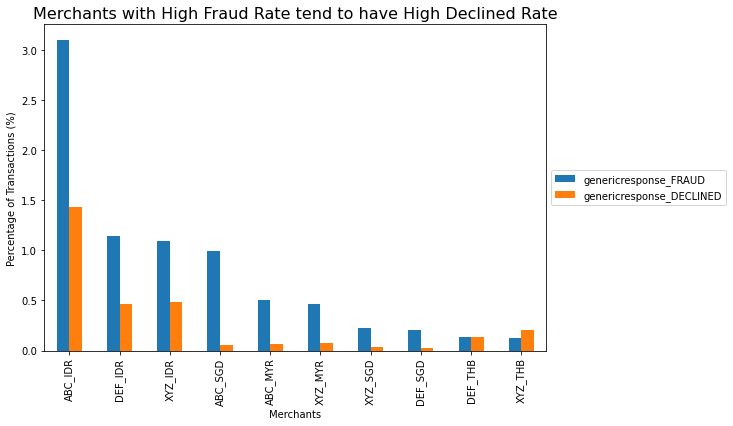

In [30]:
ax=df_train1.groupby('merchant').sum().sort_values(by=['genericresponse_FRAUD','genericresponse_DECLINED'], ascending= False)\
[['genericresponse_FRAUD','genericresponse_DECLINED']]/total_txn*100
ax.plot(kind='bar', figsize=(9,6))
plt.title('Merchants with High Fraud Rate tend to have High Declined Rate', size = 16)
plt.xlabel('Merchants')
plt.ylabel('Percentage of Transactions (%)')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Fraud
---

**% of 3D Attempt for each Generic Response Category**

In [31]:
threed = pd.DataFrame(df_train.groupby('genericresponse')['threedattempt'].value_counts()/total_txn)*100
threed.rename(columns = {'threedattempt': '%'},inplace = True)
threed.reset_index(level=['genericresponse','threedattempt'],inplace = True)
threed.head()

,genericresponse,threedattempt,%
0,APPROVED,No,47.700199
1,APPROVED,Yes,40.546244
2,BLOCK_CARD,No,0.006612
3,BLOCK_CARD,Yes,0.001102
4,CARD_EXPIRED,Yes,0.033610


C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


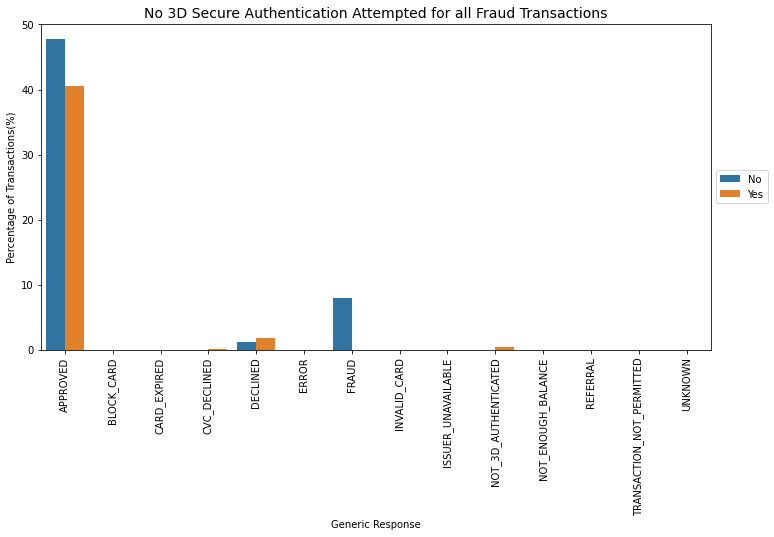

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(threed['genericresponse'], threed['%'], hue=threed['threedattempt'])
ax.set_title('No 3D Secure Authentication Attempted for all Fraud Transactions', size = 14)
ax.set_xlabel('Generic Response')
ax.set_ylabel('Percentage of Transactions(%)')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Therefore, it is suggested that merchants implement some form of 3D Authentication to prevent fraud transactions.<br>
3D Authentication is a feature that we would have to deep dive into.

**Issuer Country Code and Acquirer Account**

In [33]:
icaaf = pd.DataFrame(df_train1[df_train1['genericresponse_FRAUD']==1].\
                     groupby(['currencycode','issuercountrycode','acquireraccount'])['genericresponse_FRAUD'].\
                     sum().sort_values(ascending = False))
icaaf.reset_index(level=['issuercountrycode','acquireraccount'],inplace = True)
icaaf['%'] = icaaf['genericresponse_FRAUD']/icaaf['genericresponse_FRAUD'].sum()
icaaf = icaaf.head(10)

C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


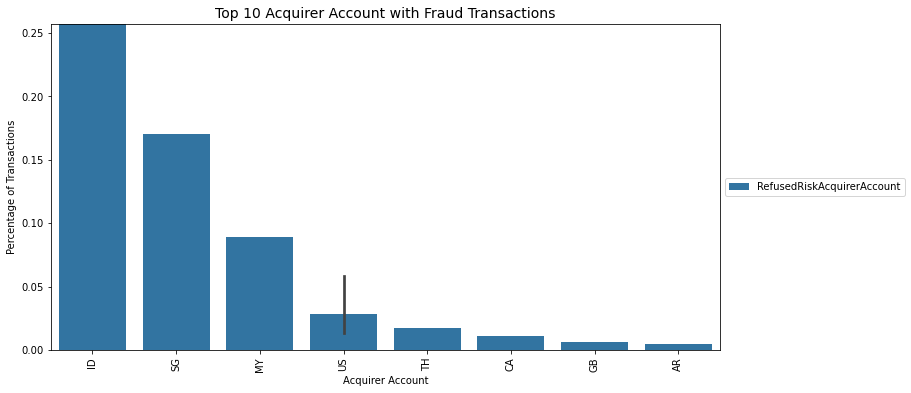

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(icaaf['issuercountrycode'], icaaf['%'], hue=icaaf['acquireraccount'])
ax.set_title('Top 10 Acquirer Account with Fraud Transactions', size = 14)
ax.set_xlabel('Acquirer Account')
ax.set_ylabel('Percentage of Transactions')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, 0.257)
plt.xticks(rotation=90)
plt.show()

In [35]:
df_train1[(df_train1['genericresponse_FRAUD']==1)].groupby(['merchant','acquireraccount','acquirer']).count().\
sort_values(by= ['merchant','genericresponse_FRAUD'],ascending = [True,False])[['genericresponse_FRAUD']]

,,,genericresponse_FRAUD
merchant,acquireraccount,acquirer,
ABC_IDR,RefusedRiskAcquirerAccount,RefusedAcquirer,5629
ABC_MYR,RefusedRiskAcquirerAccount,RefusedAcquirer,910
ABC_SGD,RefusedRiskAcquirerAccount,RefusedAcquirer,1808
DEF_IDR,RefusedRiskAcquirerAccount,RefusedAcquirer,2072
DEF_SGD,RefusedRiskAcquirerAccount,RefusedAcquirer,376
DEF_THB,RefusedRiskAcquirerAccount,RefusedAcquirer,246
XYZ_IDR,RefusedRiskAcquirerAccount,RefusedAcquirer,1989
XYZ_MYR,RefusedRiskAcquirerAccount,RefusedAcquirer,842
XYZ_SGD,RefusedRiskAcquirerAccount,RefusedAcquirer,403


All the fraud transactions have been identified and routed through RefusedRiskAcquirerAccount.

**Payment Method**

In [36]:
fraud_txn = df_train1['genericresponse_FRAUD'].sum()

In [37]:
df_train1[(df_train1['genericresponse_FRAUD']==1)].groupby('paymentmethod').count().sort_values(by=['genericresponse_FRAUD'],ascending = False)\
[['genericresponse_FRAUD']]/fraud_txn

,genericresponse_FRAUD
paymentmethod,
standarddebit,0.438453
standardcredit,0.201917
premiumcredit,0.151576
premiumdebit,0.125509
credit,0.030067
superpremiumcredit,0.023860
commercialcredit,0.014275
debit,0.008482
commercialdebit,0.002827


In [38]:
app_txn = df_train1['genericresponse_APPROVED'].sum()

In [39]:
df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby('paymentmethod').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']]/app_txn

,genericresponse_APPROVED
paymentmethod,
premiumcredit,0.249547
standardcredit,0.217873
standarddebit,0.174099
superpremiumcredit,0.125298
credit,0.098244
premiumdebit,0.068518
commercialcredit,0.032480
corporatecredit,0.009952
commercialpremiumcredit,0.008429


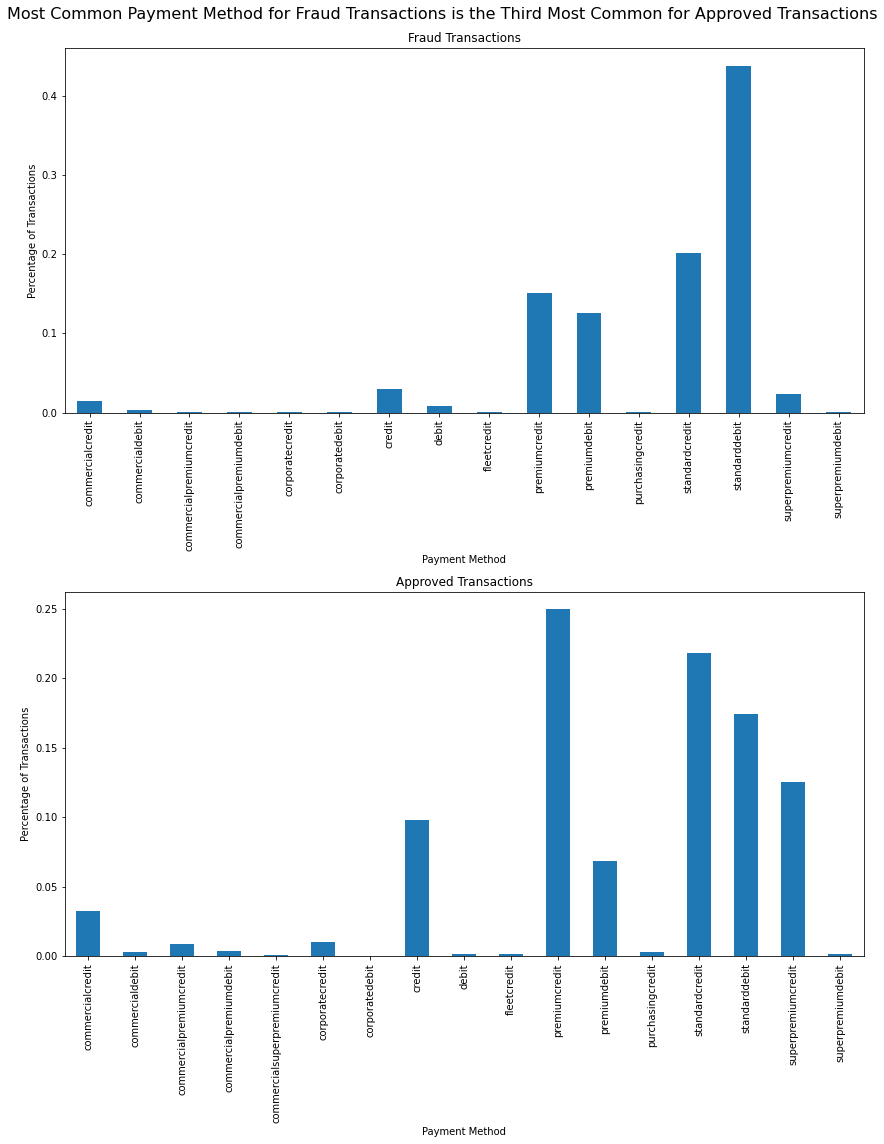

In [40]:
nr_rows = 2
nr_cols = 1

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*8))

ax=df_train1[(df_train1['genericresponse_FRAUD']==1)].groupby('paymentmethod').count()[['genericresponse_FRAUD']]/fraud_txn

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby('paymentmethod').count()[['genericresponse_APPROVED']]/app_txn

ax.plot(kind='bar', ax=axs[0], legend=False, fontsize=10, title='Fraud Transactions',\
       xlabel='Payment Method', ylabel='Percentage of Transactions')
ax1.plot(kind='bar', ax=axs[1], legend=False, fontsize=10, title='Approved Transactions',\
        xlabel='Payment Method', ylabel='Percentage of Transactions')

fig.suptitle('Most Common Payment Method for Fraud Transactions is the Third Most \
Common for Approved Transactions', size =16, y=0.99)
plt.tight_layout()
plt.show()

Standard Debit payment method makes up about 43.85% of the total fraud transactions, followed by Standard Credit and at 20.19% and Premium Credit at 15.16%.<br>
The top three payment method for fraud transactions and approved transactions are the same.<br>
Hence, we will look at these three payment method for our anyalsis.

### Deep Dive into Payment

As discovered earlier, there is no attempt of 3D authentications for all the fraud transactions.<br>
Suggest to implement 3D authentications.<br>
We will analyze at which amount threshold should 3D authentications be attempted.

**3D Attempt vs Amount**

In [41]:
df_train1[(df_train1['genericresponse_FRAUD']==1)&\
    ((df_train1['paymentmethod']=='standarddebit')|(df_train1['paymentmethod']=='standardcredit')|\
     (df_train1['paymentmethod']=='premiumcredit'))\
   ].groupby(['currencycode','paymentmethod'])['genericresponse_FRAUD','amount'].mean()[['amount']]

C:\Users\ng_li\AppData\Local\Temp\ipykernel_10892\3073048212.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train1[(df_train1['genericresponse_FRAUD']==1)&\


amount
currencycode paymentmethod               
IDR          premiumcredit   15766.666667
             standardcredit  14587.905237
             standarddebit    5023.552460
MYR          premiumcredit     658.910891
             standardcredit    640.788382
             standarddebit     561.673004
SGD          premiumcredit    3516.719745
             standardcredit   3686.075949
             standarddebit    2656.311745
THB          premiumcredit   11315.217391
             standardcredit   2625.980392
             standarddebit    6896.875000

In [42]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    ((df_train1['paymentmethod']=='standarddebit')|(df_train1['paymentmethod']=='standardcredit')|\
     (df_train1['paymentmethod']=='premiumcredit'))&\
     (df_train1['threedattempt']=='No')      
   ].groupby(['currencycode','paymentmethod'])['genericresponse_APPROVED','amount'].mean()[['amount']]

C:\Users\ng_li\AppData\Local\Temp\ipykernel_10892\2949674858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train1[(df_train1['genericresponse_APPROVED']==1)&\


amount
currencycode paymentmethod               
IDR          premiumcredit   25496.007041
             standardcredit  25264.182011
             standarddebit   20309.600439
MYR          premiumcredit    1485.282286
             standardcredit   1486.678190
             standarddebit    1168.750000
SGD          premiumcredit    1447.420622
             standardcredit   1434.996311
             standarddebit    1321.058615
THB          premiumcredit   11248.350286
             standardcredit  13529.739597
             standarddebit   11391.815631

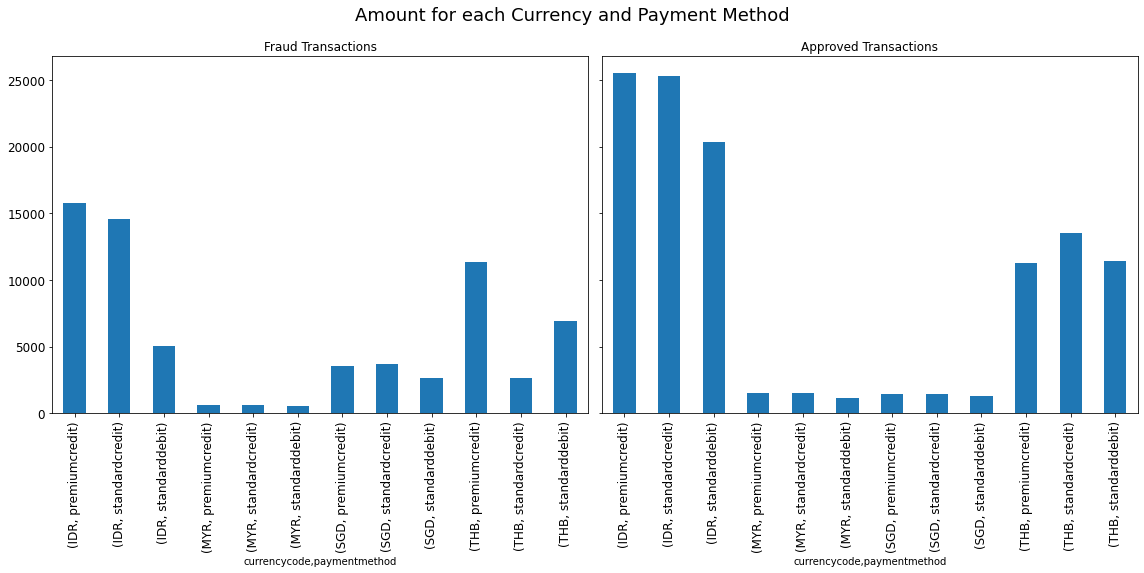

In [43]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*8), sharey=True)

ax=df_train1[(df_train1['genericresponse_FRAUD']==1)&\
    ((df_train1['paymentmethod']=='standarddebit')|(df_train1['paymentmethod']=='standardcredit')|\
     (df_train1['paymentmethod']=='premiumcredit'))\
   ].groupby(['currencycode','paymentmethod'])['amount'].mean()

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    ((df_train1['paymentmethod']=='standarddebit')|(df_train1['paymentmethod']=='standardcredit')|\
     (df_train1['paymentmethod']=='premiumcredit'))&\
     (df_train1['threedattempt']=='No')      
   ].groupby(['currencycode','paymentmethod'])['amount'].mean()

ax.plot(kind='bar', ax=axs[0], legend=False, fontsize=12, title='Fraud Transactions')
ax1.plot(kind='bar', ax=axs[1], legend=False, fontsize=12, title='Approved Transactions')

fig.suptitle('Amount for each Currency and Payment Method', size =18, y=0.99)
plt.tight_layout()
plt.show()

The transacted amount for each currency and payment type are generally higher for approved transactions.
However, 3D authentication still plays an important role in preventing frauds.
As such, suggest to implement 3DS2 authentication where it provides a more frictionless authentication that would less likely dampen the customers' payment experience, for amount below the below thresholds:

| currencycode | paymentmethod | Threshold Amount |
| --- | --- | --- |
| IDR | premium credit | 25,500 |
| IDR | standard credit | 25,500 |
| IDR | standard debit | 20,500 |
| MYR | premium credit | 1,500 |
| MYR | standard credit | 1,500 |
| MYR | standard debit | 1,500 |
| SGD | premium credit | 3,500 |
| SGD | standard credit | 3,700 |
| SGD | standard debit | 2,700 |
| THB | premium credit | 11,500 |
| THB | standard credit | 13,500 |
| THB | standard debit | 11,500 |

It is assumed that fraud can happen at any day and at any time.
Therefore we will not dive into the day and hour analysis.

### Declined Transactions
---
The analysis for the following sections will be based on declined transactions.

**Issuer Country Code**

In [44]:
ic = pd.DataFrame(df_train[df_train['genericresponse']=="DECLINED"].\
                  groupby('genericresponse')['issuercountrycode'].value_counts()/total_txn)
ic.rename(columns = {'issuercountrycode': '%'},inplace = True)
ic.reset_index(level=['genericresponse','issuercountrycode'],inplace = True)
ic=ic.head(10)

C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


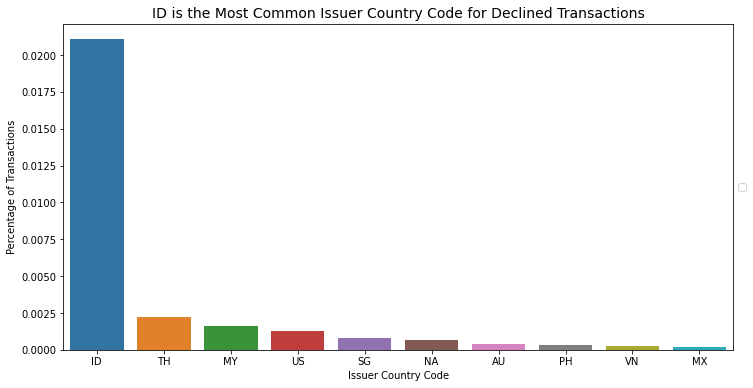

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(ic['issuercountrycode'], ic['%'])
ax.set_title('ID is the Most Common Issuer Country Code for Declined Transactions', size = 14)
ax.set_xlabel('Issuer Country Code')
ax.set_ylabel('Percentage of Transactions')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Issuer Country Code and Acquirer Account**

In [46]:
icaa = pd.DataFrame(df_train1.groupby(['currencycode','issuercountrycode','acquireraccount'])['genericresponse_DECLINED'].sum().sort_values(ascending = False))
icaa.reset_index(level=['issuercountrycode','acquireraccount'],inplace = True)
icaa['%'] = icaa['genericresponse_DECLINED']/icaa['genericresponse_DECLINED'].sum()
icaa=icaa[icaa['genericresponse_DECLINED']> 100]

C:\Users\ng_li\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


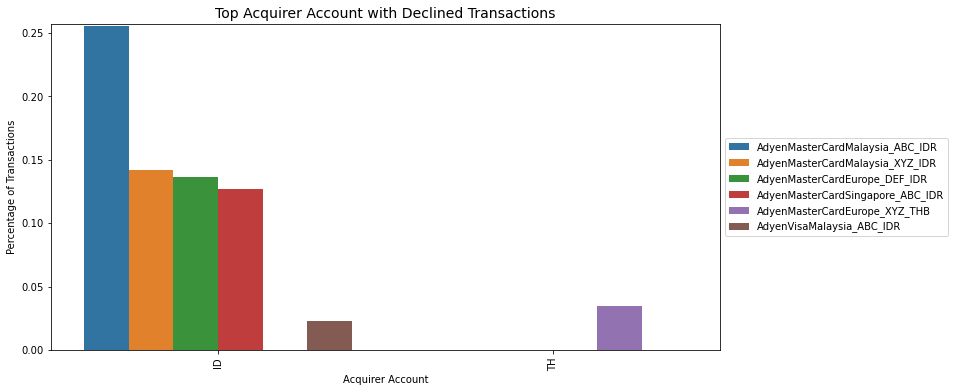

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(icaa['issuercountrycode'], icaa['%'], hue=icaa['acquireraccount'])
ax.set_title('Top Acquirer Account with Declined Transactions', size = 14)
ax.set_xlabel('Acquirer Account')
ax.set_ylabel('Percentage of Transactions')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, 0.257)
plt.xticks(rotation=90)
plt.show()

In [48]:
df_train1[(df_train1['genericresponse_DECLINED']==1)].groupby(['acquireraccount','currencycode',\
                                                               'issuercountrycode']).count().\
sort_values(by= ['genericresponse_DECLINED'],ascending =False)[['genericresponse_DECLINED']].head(10)/\
df_train1[(df_train1['genericresponse_DECLINED']==1)][['genericresponse_DECLINED']].sum()

,,,genericresponse_DECLINED
acquireraccount,currencycode,issuercountrycode,
AdyenMasterCardMalaysia_ABC_IDR,IDR,ID,0.255496
AdyenMasterCardMalaysia_XYZ_IDR,IDR,ID,0.142435
AdyenMasterCardEurope_DEF_IDR,IDR,ID,0.136708
AdyenMasterCardSingapore_ABC_IDR,IDR,ID,0.126917
AdyenMasterCardEurope_XYZ_THB,THB,TH,0.035101
AdyenVisaMalaysia_ABC_IDR,IDR,ID,0.022908
AdyenMasterCardSingapore_DEF_THB,THB,TH,0.017735
AdyenVisaMalaysia_XYZ_MYR,MYR,MY,0.013301
AdyenVisaMalaysia_ABC_MYR,MYR,MY,0.012747


In [49]:
df_train1[(df_train1['genericresponse_DECLINED']==1)].groupby(['acquireraccount','currencycode',\
                                                               'issuercountrycode']).count().\
sort_values(by= ['genericresponse_DECLINED'],ascending =False)[['genericresponse_DECLINED']].tail(20)/\
df_train1[(df_train1['genericresponse_DECLINED']==1)][['genericresponse_DECLINED']].sum()

genericresponse_DECLINED
acquireraccount                  currencycode issuercountrycode                          
AdyenVisaMalaysia_ABC_IDR        IDR          GT                                 0.000185
                                              GB                                 0.000185
                                              DE                                 0.000185
                                              BE                                 0.000185
AdyenVisaEurope_XYZ_THB          THB          US                                 0.000185
                                              UA                                 0.000185
                                              TW                                 0.000185
                                              HK                                 0.000185
                                              BN                                 0.000185
AdyenMasterCardEurope_XYZ_THB    THB          LV                                 0.000185
AdyenVisaEurope_DEF_IDR          IDR          CN                                 0.000185
AdyenMasterCardSingapore_XYZ_SGD SGD          KR                                 0.000185
                                              ID                                 0.000185
AdyenMasterCardSingapore_DEF_THB THB          ZA                                 0.000185
                                              TW                                 0.000185
AdyenMasterCardEurope_XYZ_THB    THB          QA                                 0.000185
AdyenMasterCardSingapore_DEF_THB THB          SE                                 0.000185
                                              RU                                 0.000185
                                              KR                                 0.000185
AdyenVisaSingapore_XYZ_SGD       SGD          VN                                 0.000185

For majority of the declined transactions, there is no difference in the acquirer account currency, issuer account currency and the transacted currency.<br>
It is noted that the is a small percentage of such incidents, however, it is not huge enough for us to deep dive into it.

In [50]:
df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby(['acquireraccount','currencycode',\
                                                               'issuercountrycode']).count().\
sort_values(by= ['genericresponse_APPROVED'],ascending =False)[['genericresponse_APPROVED']].head(10)/\
df_train1[(df_train1['genericresponse_APPROVED']==1)][['genericresponse_APPROVED']].sum()

,,,genericresponse_APPROVED
acquireraccount,currencycode,issuercountrycode,
AdyenVisaMalaysia_ABC_IDR,IDR,ID,0.063748
AdyenVisaMalaysia_XYZ_MYR,MYR,MY,0.057891
AdyenVisaMalaysia_ABC_MYR,MYR,MY,0.057598
AdyenMasterCardSingapore_ABC_IDR,IDR,ID,0.053964
AdyenMasterCardMalaysia_XYZ_MYR,MYR,MY,0.048613
AdyenMasterCardMalaysia_ABC_MYR,MYR,MY,0.048576
AdyenVisaSingapore_DEF_THB,THB,TH,0.043169
AdyenVisaSingapore_ABC_IDR,IDR,ID,0.041982
AdyenMasterCardEurope_DEF_IDR,IDR,ID,0.041727


In [51]:
df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby(['acquireraccount','currencycode',\
                                                               'issuercountrycode']).count().\
sort_values(by= ['genericresponse_APPROVED'],ascending =False)[['genericresponse_APPROVED']].tail(10)/\
df_train1[(df_train1['genericresponse_APPROVED']==1)][['genericresponse_APPROVED']].sum()

genericresponse_APPROVED
acquireraccount                  currencycode issuercountrycode                          
AdyenVisaEurope_XYZ_THB          THB          PK                                 0.000006
                                              OM                                 0.000006
                                              KH                                 0.000006
                                              IL                                 0.000006
                                              IE                                 0.000006
                                              FI                                 0.000006
                                              EC                                 0.000006
                                              CZ                                 0.000006
                                              CO                                 0.000006
AdyenMasterCardSingapore_XYZ_SGD SGD          SE                                 0.000006

The same is observed for approved transactions.<br>
<br>
Hence, concluding that difference in acquirer account currency, issuer account currency and the transacted currency has minor impact on the authorization rate.

**Payment Method**

In [52]:
decline_txn = df_train1['genericresponse_DECLINED'].sum()

In [53]:
df_train1[(df_train1['genericresponse_DECLINED']==1)].groupby('paymentmethod').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']]/decline_txn

,genericresponse_DECLINED
paymentmethod,
standarddebit,0.636061
credit,0.100129
commercialcredit,0.059671
superpremiumcredit,0.040089
standardcredit,0.032884
premiumdebit,0.029189
premiumcredit,0.027342
commercialpremiumcredit,0.019952
corporatecredit,0.014964


In [54]:
app_txn = df_train1['genericresponse_APPROVED'].sum()

In [55]:
df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby('paymentmethod').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']]/app_txn

,genericresponse_APPROVED
paymentmethod,
premiumcredit,0.249547
standardcredit,0.217873
standarddebit,0.174099
superpremiumcredit,0.125298
credit,0.098244
premiumdebit,0.068518
commercialcredit,0.032480
corporatecredit,0.009952
commercialpremiumcredit,0.008429


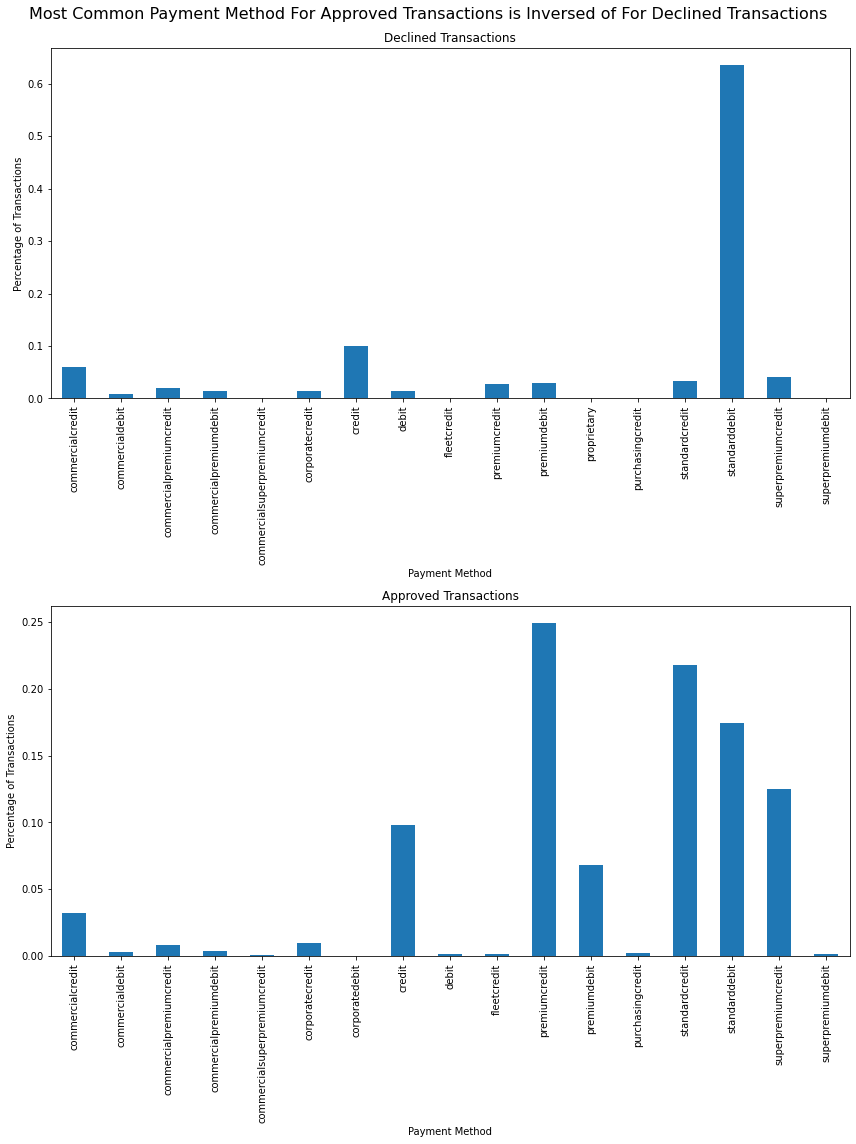

In [56]:
nr_rows = 2
nr_cols = 1

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*8))

ax=df_train1[(df_train1['genericresponse_DECLINED']==1)].groupby('paymentmethod').count()\
[['genericresponse_DECLINED']]/decline_txn

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)].groupby('paymentmethod').count()\
[['genericresponse_APPROVED']]/app_txn

ax.plot(kind='bar', ax=axs[0], legend=False, fontsize=10, title='Declined Transactions',\
       xlabel='Payment Method', ylabel='Percentage of Transactions')
ax1.plot(kind='bar', ax=axs[1], legend=False, fontsize=10, title='Approved Transactions',\
       xlabel='Payment Method', ylabel='Percentage of Transactions')

fig.suptitle('Most Common Payment Method For Approved Transactions is Inversed of For Declined Transactions', size =16, y=0.99)
plt.tight_layout()
plt.show()

Premium Credit and Standard Credit make up almost half (46.74%) of the payment type for approved transactions.<br>
The most common payment method for declined tranasaction is standard debit.<br>
Standard Debit is the third most common payment method for approved transactions making up to 17.41% of total approved transactions.<br>
We will look more into Standard Debit payment type to see what factors affects the approval rates.

### Deep Dive into Payment = standarddebit

**3D Attempt**

In [57]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']]/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

,genericresponse_DECLINED
threedattempt,
Yes,0.648562
No,0.351438


In [58]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']]/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

,genericresponse_APPROVED
threedattempt,
Yes,0.67372
No,0.32628


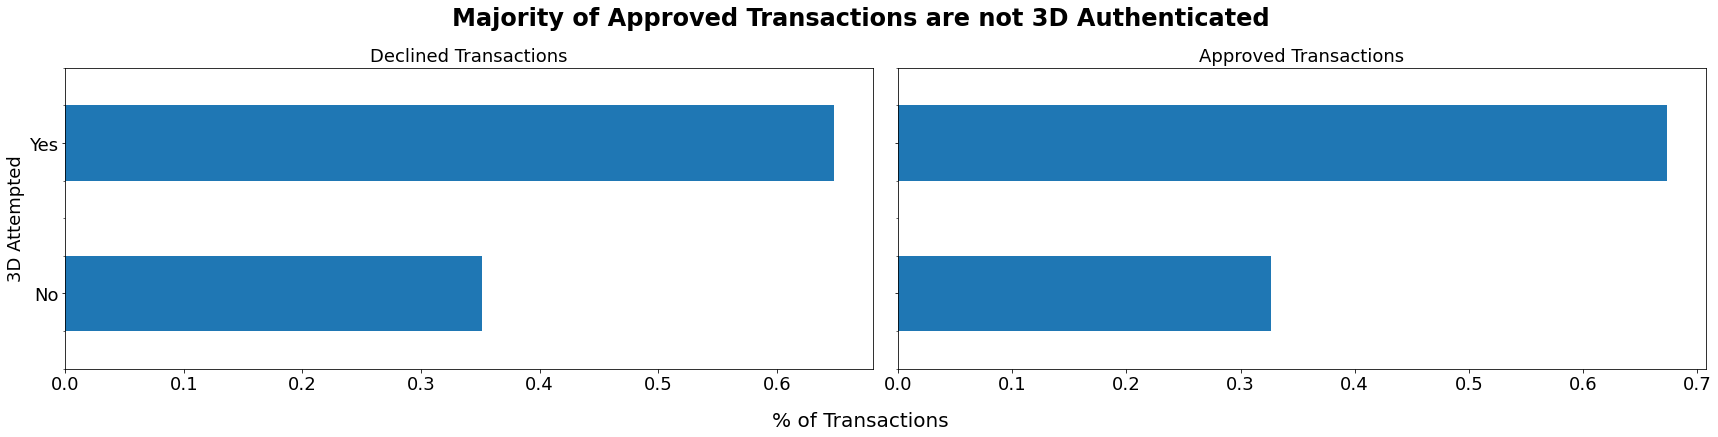

In [59]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*6), sharey=True)

ax=df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt').count().sort_values(by=['genericresponse_DECLINED'],ascending = True)\
[['genericresponse_DECLINED']]/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt').count().sort_values(by=['genericresponse_APPROVED'],ascending = True)\
[['genericresponse_APPROVED']]/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

ax.plot(kind='barh', ax=axs[0], legend=False, fontsize=18)
ax1.plot(kind='barh', ax=axs[1], legend=False, fontsize=18)

axs[0].set_title('Declined Transactions',size= 18)
axs[0].set_ylabel('3D Attempted',size= 18)

axs[1].set_title('Approved Transactions',size= 18)
axs[1].set_ylabel('3D Attempted',size= 18)

fig.suptitle('Majority of Approved Transactions are not 3D Authenticated', size = 24,fontweight='bold', y=0.99)
fig.supxlabel('% of Transactions', size=20, x=0.5)
plt.tight_layout()
plt.show()

Percentage of transaction without 3D authentication attempt is about the same for both approved and declined transaction.<br>
We need to look more into what caused the transactions to be declined for transactions without 3D authentication attempt. 

**3D Attempt vs Amount**

In [60]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt')['amount'].mean().sort_values(ascending = False)

threedattempt
No     52045.247107
Yes      980.295567
Name: amount, dtype: float64

In [61]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt')['amount'].mean().sort_values(ascending = False)

threedattempt
No     15480.272587
Yes     1146.248217
Name: amount, dtype: float64

C:\Users\ng_li\AppData\Local\Temp\ipykernel_10892\2462797288.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(),size=20, rotation=30)
C:\Users\ng_li\AppData\Local\Temp\ipykernel_10892\2462797288.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(),size=20, rotation=30)


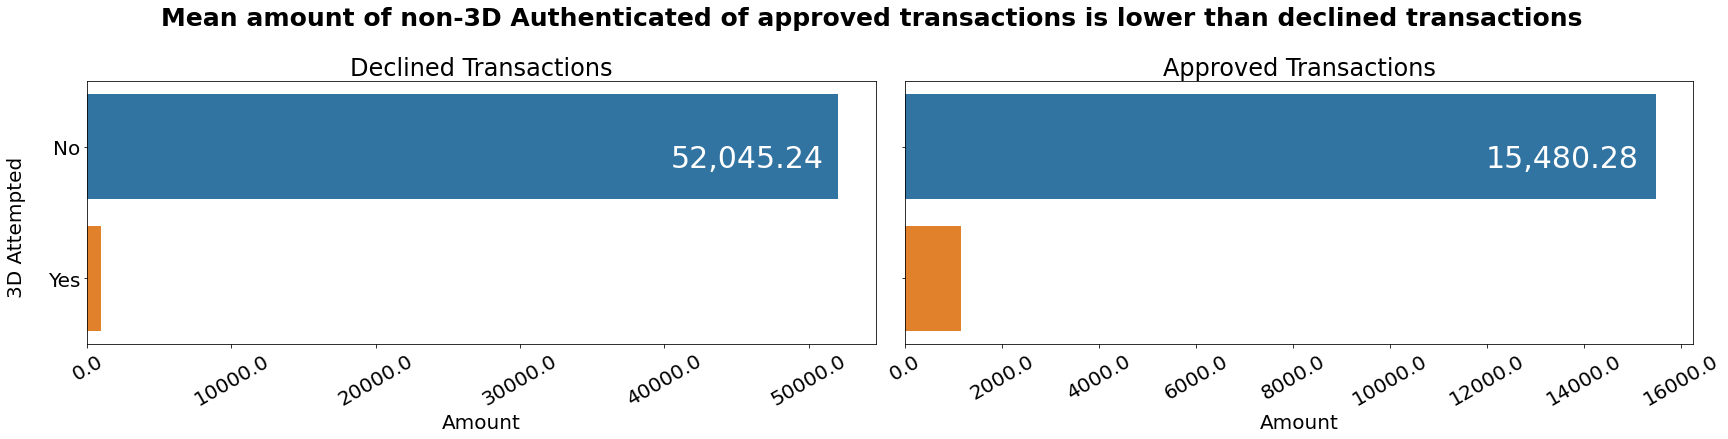

In [62]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*6), sharey=True)

ax=df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt')['amount'].mean().sort_values(ascending = False)

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('threedattempt')['amount'].mean().sort_values(ascending = False)

sns.barplot(ax=axs[0], y=ax.index, x=ax.values, orient = 'h')
axs[0].set_title('Declined Transactions',size=24)
axs[0].set_xticklabels(axs[0].get_xticks(),size=20, rotation=30)
axs[0].set_xlabel('Amount', size=20)
axs[0].set_yticklabels(labels=['No', 'Yes'],size=20)
axs[0].set(ylabel=None)
axs[0].annotate('52,045.24',
            xy=(49000, 0.05), xycoords='data',
            xytext=(30, -20), textcoords='offset points',
                size=30, color='white',
            horizontalalignment='right', verticalalignment='bottom')

sns.barplot(ax=axs[1], y=ax1.index, x=ax1.values, orient = 'h')
axs[1].set_title('Approved Transactions',size= 24)
axs[1].set_xticklabels(axs[1].get_xticks(),size=20, rotation=30)
axs[1].set_xlabel('Amount', size=20)
axs[1].set(ylabel=None)
axs[1].annotate('15,480.28',
            xy=(14500, 0.05), xycoords='data',
            xytext=(30, -20), textcoords='offset points',
                size=30, color='white',
            horizontalalignment='right', verticalalignment='bottom')

fig.suptitle('Mean amount of non-3D Authenticated of approved transactions is lower \
than declined transactions',size=25, fontweight='bold', y=1.01)
fig.supylabel('3D Attempted', size=20, x=0)
plt.tight_layout()
plt.show()

The mean transacted amount (15,572.29) for approved transactions without 3D authentication attempt is much lower than the mean amount (51,222.20) for declined transaction for standard debit payment method.<br>
It is likely that the amount is a factor causing the transactions to be declined for Standard Debit payment method.<br>
Hence, suggest to implement 3D authentication for Standard Debit payment method.

**3D Attempt, Amount and Currency**

In [63]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&
    (df_train1['threedattempt']=='No')\
   ].groupby('currencycode')['amount'].mean().sort_values(ascending = False)

currencycode
IDR    53983.361646
THB    26885.416667
SGD     1762.500000
Name: amount, dtype: float64

In [64]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&
    (df_train1['threedattempt']=='No')\
   ].groupby('currencycode')['amount'].mean().sort_values(ascending = False)

currencycode
IDR    20309.600439
THB    11391.815631
SGD     1321.058615
MYR     1168.750000
Name: amount, dtype: float64

C:\Users\ng_li\AppData\Local\Temp\ipykernel_10892\592255417.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(),size=20)


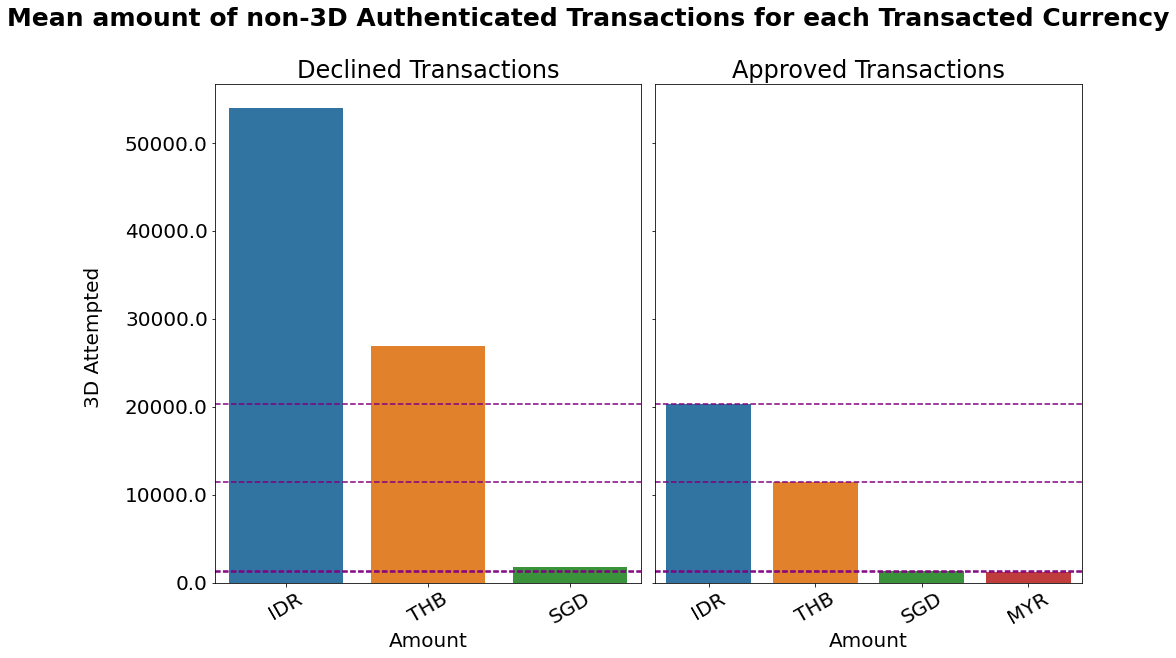

In [65]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*9), sharey=True)

ax=df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&
    (df_train1['threedattempt']=='No')\
   ].groupby('currencycode')['amount'].mean().sort_values(ascending = False)

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&
    (df_train1['threedattempt']=='No')\
   ].groupby('currencycode')['amount'].mean().sort_values(ascending = False)

sns.barplot(ax=axs[0], x=ax.index, y=ax.values)
axs[0].set_title('Declined Transactions',size=24)
axs[0].set_xticklabels(labels=['IDR','THB','SGD'],size=20, rotation=30)
axs[0].set_xlabel('Amount', size=20)
axs[0].set_yticklabels(axs[0].get_yticks(),size=20)
axs[0].set(ylabel=None)
axs[0].axhline(y=20309.600439, color = 'purple', linestyle='dashed')
axs[0].axhline(y=11391.815631, color='purple', linestyle='dashed')
axs[0].axhline(y=1321.058615, color='purple', linestyle='dashed')
axs[0].axhline(y=1168.75, color='purple', linestyle='dashed')

sns.barplot(ax=axs[1], x=ax1.index, y=ax1.values)
axs[1].set_title('Approved Transactions',size= 24)
axs[1].set_xticklabels(labels=['IDR','THB','SGD','MYR'],size=20, rotation=30)
axs[1].set_xlabel('Amount', size=20)
axs[1].set(ylabel=None)
axs[1].axhline(y=20309.600439, color = 'purple', linestyle='dashed')
axs[1].axhline(y=11391.815631, color='purple', linestyle='dashed')
axs[1].axhline(y=1321.058615, color='purple', linestyle='dashed')
axs[1].axhline(y=1168.75, color='purple', linestyle='dashed')

fig.suptitle('Mean amount of non-3D Authenticated Transactions \
for each Transacted Currency',size=25, fontweight='bold', y=1.01)
fig.supylabel('3D Attempted', size=20, x=0)

plt.tight_layout()
plt.show()

Suggest to implement 3D authentication for Standard Debit payment method if the amount ia above certain threshold for each currency.

| currencycode | Threshold Amount |
| --- | --- |
| IDR | 20,500 |
| THB | 11,500 |
| SGD | 1,500 |
| MYR | 1,500 |

**Calendar Day of Transaction**

In [66]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']].head()/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

,genericresponse_DECLINED
day,
18,0.054604
26,0.046181
17,0.044148
21,0.043857
22,0.043567


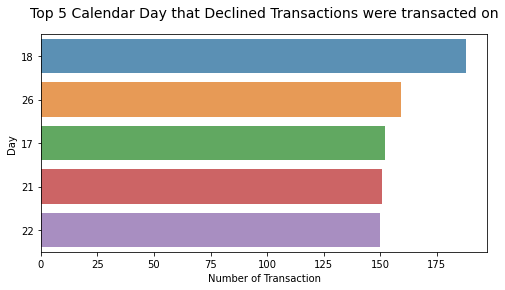

In [67]:
day = df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']].head()

plt.figure(figsize=(8,4))
ax = sns.barplot(y=day.index, x=day['genericresponse_DECLINED'], alpha=0.8, orient = 'h', order=day.sort_values('genericresponse_DECLINED',ascending = False).index)
ax.set_title('Top 5 Calendar Day that Declined Transactions were transacted on', size = 14, y=1.05)
ax.set_xlabel('Number of Transaction')
ax.set_ylabel('Day')
plt.show()

In [68]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']].head()/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

,genericresponse_APPROVED
day,
20,0.033388
29,0.033352
28,0.033281
21,0.032850
27,0.032815


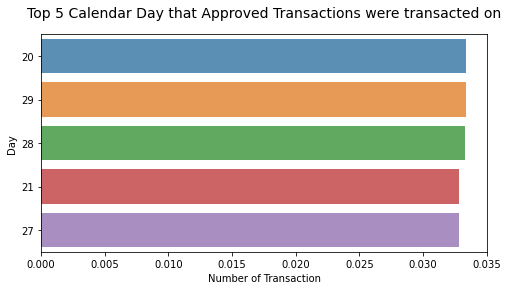

In [69]:
day = df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']].head()/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

plt.figure(figsize=(8,4))
ax = sns.barplot(y=day.index, x=day['genericresponse_APPROVED'], alpha=0.8, orient = 'h', order=day.sort_values('genericresponse_APPROVED',ascending = False).index)
ax.set_title('Top 5 Calendar Day that Approved Transactions were transacted on', size = 14, y=1.05)
ax.set_xlabel('Number of Transaction')
ax.set_ylabel('Day')
plt.show()

Best calendar days to route standard debit payments are:
- 20
- 29
- 38
<br><br>

Calendar days to avoid routing standard debit payments are:
- 18
- 26
- 17

**Hour of Transaction**

In [70]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('hour').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']].head()/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

,genericresponse_DECLINED
hour,
15,0.066221
18,0.065350
14,0.064188
12,0.060412
19,0.060412


In [71]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('hour').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']].head()/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

,genericresponse_APPROVED
hour,
19,0.067350
18,0.064051
17,0.061146
9,0.061074
13,0.059138


Hour 18 and 19 are in the top 5 hours for both approved and declined transactions.<br>
We will analyze further for these two hours, which calendar day is best to avoid.

**Calendar Day and Hour**

In [72]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['hour']==18)|(df_train1['hour']==19))
   ].groupby(['day']).count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']].head(10)/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['hour']==18)|(df_train1['hour']==19))][['genericresponse_DECLINED']].sum()

,genericresponse_DECLINED
day,
18,0.096998
27,0.060046
13,0.060046
16,0.053118
22,0.043880
19,0.043880
24,0.041570
17,0.039261
28,0.036952


In [73]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['hour']==18)|(df_train1['hour']==19))
   ].groupby(['day']).count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']].head(10)/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['hour']==18)|(df_train1['hour']==19))][['genericresponse_APPROVED']].sum()

,genericresponse_APPROVED
day,
16,0.040393
12,0.040120
25,0.037391
30,0.036572
19,0.036026
20,0.035207
10,0.035207
2,0.034934
23,0.034389


If merchants want to route the payment at the 18th and 19th hour, it is best to avoid doing it on:
- 18
- 27
- 13

**Day of the Week**

In [74]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day_of_week').count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']]/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

,genericresponse_DECLINED
day_of_week,
0,0.167296
1,0.162649
6,0.151322
3,0.138542
4,0.133895
2,0.128376
5,0.117920


In [75]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day_of_week').count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']]/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

,genericresponse_APPROVED
day_of_week,
1,0.161849
0,0.161168
6,0.159912
5,0.130684
4,0.129788
3,0.128604
2,0.127995


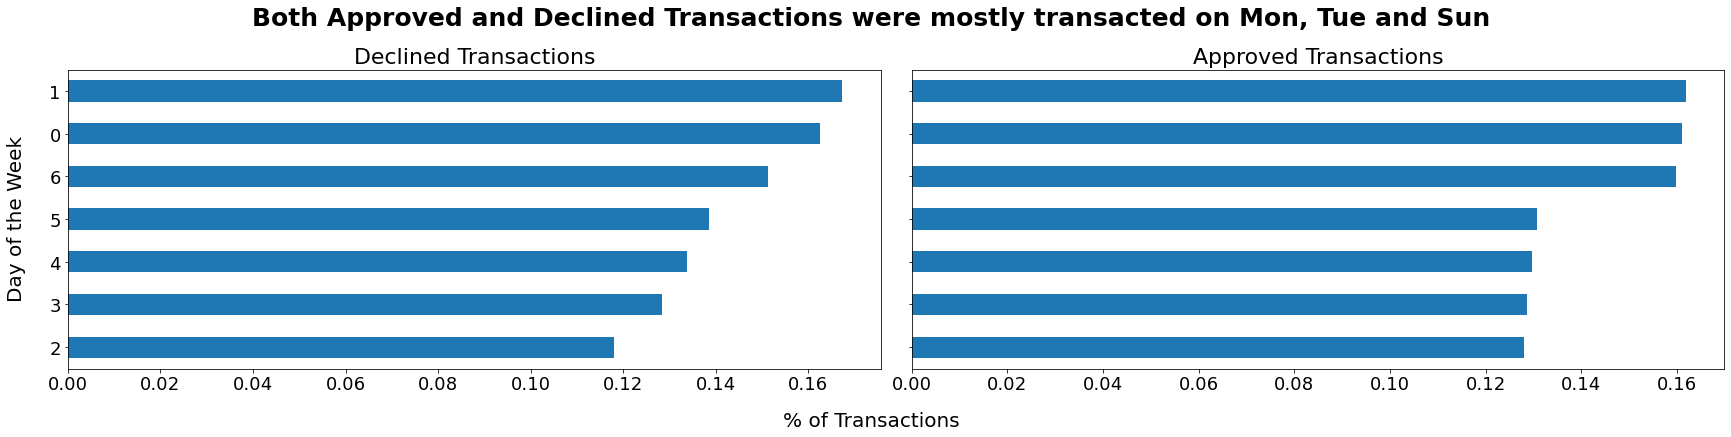

In [76]:
nr_rows = 1
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*6), sharey=True)

ax=df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day_of_week').count().sort_values(by=['genericresponse_DECLINED'],ascending = True)\
[['genericresponse_DECLINED']]/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_DECLINED']].sum()

ax1=df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')\
   ].groupby('day_of_week').count().sort_values(by=['genericresponse_APPROVED'],ascending = True)\
[['genericresponse_APPROVED']]/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')][['genericresponse_APPROVED']].sum()

ax.plot(kind='barh', ax=axs[0], legend=False, fontsize=18)
ax1.plot(kind='barh', ax=axs[1], legend=False, fontsize=18)

axs[0].set_title('Declined Transactions',size= 22)
axs[1].set_title('Approved Transactions',size= 22)
axs[0].set(ylabel=None)

fig.suptitle('Both Approved and Declined Transactions were mostly transacted on Mon, Tue and Sun', size = 25,fontweight='bold', y=0.99)
fig.supxlabel('% of Transactions', size=20, x=0.5)
fig.supylabel('Day of the Week', size=20, x=0)
plt.tight_layout()
plt.show()

**Day of the Week and Hour**

In [77]:
df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['day_of_week']==0)|(df_train1['day_of_week']==1)|(df_train1['day_of_week']==6))
   ].groupby(['day_of_week','hour']).count().sort_values(by=['genericresponse_DECLINED'],ascending = False)\
[['genericresponse_DECLINED']].head(10)/df_train1[(df_train1['genericresponse_DECLINED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['day_of_week']==0)|(df_train1['day_of_week']==1)|(df_train1['day_of_week']==6))][['genericresponse_DECLINED']].sum()

genericresponse_DECLINED
day_of_week hour                          
1           12                    0.025951
0           15                    0.025951
1           16                    0.025347
            14                    0.024140
6           22                    0.024140
0           19                    0.023537
            14                    0.023537
6           14                    0.022933
0           20                    0.022330
6           15                    0.021726

In [78]:
df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['day_of_week']==0)|(df_train1['day_of_week']==1)|(df_train1['day_of_week']==6))
   ].groupby(['day_of_week','hour']).count().sort_values(by=['genericresponse_APPROVED'],ascending = False)\
[['genericresponse_APPROVED']].head(10)/df_train1[(df_train1['genericresponse_APPROVED']==1)&\
    (df_train1['paymentmethod']=='standarddebit')&\
    ((df_train1['day_of_week']==0)|(df_train1['day_of_week']==1)|(df_train1['day_of_week']==6))][['genericresponse_APPROVED']].sum()

genericresponse_APPROVED
day_of_week hour                          
0           19                    0.026511
6           14                    0.024506
0           9                     0.024209
6           15                    0.022947
1           9                     0.022427
            18                    0.021833
0           18                    0.021610
6           19                    0.021461
1           19                    0.021164
6           13                    0.021016

Day of the week and hour to avoid routing standard debit payments are:
- Tue, 12pm
- Mon, 3pm
- Tue, 4pm
<br><br>

Best day of the week and hour to route standard debit payments are:
- Mon, 7pm
- Sun, 2pm
- Mon, 9am

---

## Apply OrdinalEncoder to Categorical Features
---

### Train Set

**paymentmethod**

In [79]:
paymentmethod_list = list(df_train['paymentmethod'])

df_train[['paymentmethod']] = OrdinalEncoder(categories=[paymentmethod_list],
                     handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_train[['paymentmethod']])

#### threedattempt

In [80]:
df_train[['threedattempt']] = OrdinalEncoder(categories=[['No','Yes']],
                     handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_train[['threedattempt']])

**genericresponse**

In [81]:
genericresponse_list = ['APPROVED',
                        'FRAUD',
                        'DECLINED',
                        'NOT_3D_AUTHENTICATED',
                        'CVC_DECLINED',
                        'NOT_ENOUGH_BALANCE',
                        'TRANSACTION_NOT_PERMITTED',
                        'CARD_EXPIRED',
                        'INVALID_CARD',
                        'ERROR',
                        'ISSUER_UNAVAILABLE',
                        'BLOCK_CARD',
                        'UNKNOWN',
                        'REFERRAL']

In [82]:
df_train[['genericresponse']] = OrdinalEncoder(categories=[genericresponse_list], handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_train[['genericresponse']])

### Test Set

**paymentmethod**

In [83]:
paymentmethod_list = list(df_test['paymentmethod'])

df_test[['paymentmethod']] = OrdinalEncoder(categories=[paymentmethod_list],
                     handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_test[['paymentmethod']])

#### threedattempt

In [84]:
df_test[['threedattempt']] = OrdinalEncoder(categories=[['No','Yes']],
                     handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_test[['threedattempt']])

**genericresponse**

In [85]:
df_test[['genericresponse']] = OrdinalEncoder(categories=[genericresponse_list],
                     handle_unknown='use_encoded_value',unknown_value = -1).fit_transform(df_test[['genericresponse']])

## Heatmap to see Correlation
---

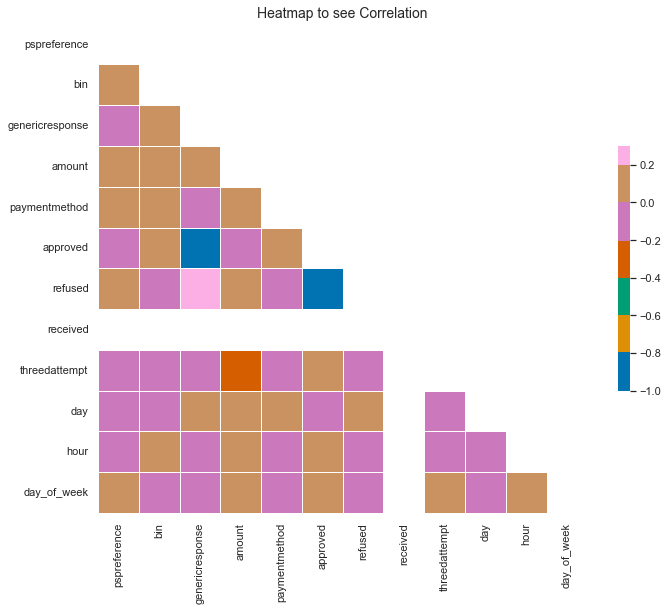

In [86]:
sns.set_theme(style='white')

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette('colorblind')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title("Heatmap to see Correlation", size=14)
plt.show()

## X_train, y_train
---

In [87]:
df_train.columns

Index(['pspreference', 'currencycode', 'issuercountrycode', 'bin',
       'creationdate', 'genericresponse', 'amount', 'scheme', 'merchant',
       'company', 'acquireraccount', 'acquirer', 'journaltype',
       'paymentmethod', 'approved', 'refused', 'received', 'threedattempt',
       'day', 'hour', 'day_of_week'],
      dtype='object')

In [88]:
# Define X_train and y_train
X_train = df_train[['paymentmethod',
                 'threedattempt',
                    'amount',
                 'day',
                 'hour',
                'day_of_week'
                ]]
y_train = df_train['genericresponse']

### Variance Inflation Factor (VIF) 

In [89]:
# VIF dataframe
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif['features'] = x_temp.columns
vif.round(5).sort_values(by='vif_factor', ascending=False)

,vif_factor,features
0,255451.43665,const
2,1.09165,threedattempt
3,1.09077,amount
5,1.00130,hour
6,1.00109,day_of_week
4,1.00082,day
1,1.00004,paymentmethod


### Scaling

In [90]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)

### X_Test, y_test

In [91]:
# Define X_train and y_train
X_test = df_test[['paymentmethod',
                 'threedattempt',
                    'amount',
                 'day',
                 'hour',
                'day_of_week'
                ]]
y_test = df_test['genericresponse']

In [92]:
X_test_scaled=ss.fit_transform(X_test)

## Base Model
----

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb

In [94]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
trainscore = lr.score(X_train_scaled, y_train)
testscore = lr.score(X_test_scaled, y_test)
print(f"Train Set Accuracy: {trainscore} \nTest Set Accuracy: {testscore} \n ")

Train Set Accuracy: 0.8823872965497482 
Test Set Accuracy: 0.881385815665359 
 


C:\Users\ng_li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RSME

In [95]:
from sklearn.metrics import mean_squared_error as mse

In [96]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)
rmse_train = mse(y_train, y_pred_train, squared=False)
rmse_test = mse(y_test, y_pred_test, squared=False)
print(f"Training RMSE: {rmse_train} \n\
Testing RMSE: {rmse_test} \n ")

Training RMSE: 0.6081957212353533 
Testing RMSE: 0.603686825889724 
 


### Coefficient

In [97]:
# Coefficient for 'Approved' class
coefs = lr.coef_
approved_coef = pd.DataFrame(zip(X_train.columns, coefs[0,:]), columns=['feature', 'coef'])
approved_coef['abs_coef'] = approved_coef['coef'].apply(lambda x: abs(x))
approved_coef = approved_coef.sort_values('abs_coef', ascending=False)
approved_coef

,feature,coef,abs_coef
2,amount,0.696473,0.696473
1,threedattempt,-0.194877,0.194877
4,hour,0.118909,0.118909
5,day_of_week,-0.096571,0.096571
0,paymentmethod,0.012878,0.012878
3,day,-0.010195,0.010195


In [98]:
fraud_coef = pd.DataFrame(zip(X_train.columns, coefs[1,:]), columns=['feature', 'coef'])
fraud_coef['abs_coef'] = fraud_coef['coef'].apply(lambda x: abs(x))
fraud_coef = fraud_coef.sort_values('abs_coef', ascending=False)
fraud_coef

,feature,coef,abs_coef
1,threedattempt,-4.808873,4.808873
5,day_of_week,-0.089575,0.089575
0,paymentmethod,0.070181,0.070181
2,amount,0.022404,0.022404
4,hour,0.022086,0.022086
3,day,0.021720,0.021720


In [99]:
declined_coef = pd.DataFrame(zip(X_train.columns, coefs[2,:]), columns=['feature', 'coef'])
declined_coef['abs_coef'] = declined_coef['coef'].apply(lambda x: abs(x))
declined_coef = declined_coef.sort_values('abs_coef', ascending=False)
declined_coef

,feature,coef,abs_coef
2,amount,0.947852,0.947852
1,threedattempt,0.224769,0.224769
5,day_of_week,-0.122675,0.122675
4,hour,0.073842,0.073842
3,day,0.069388,0.069388
0,paymentmethod,-0.030834,0.030834


## Conclusion and Recommendation
---

**3D Authentication Attempt**<br>
63.6% of declined transactions are transacted using standard debit payment method.<br>
As a large percentage of declined transactions are transacted using standard debit payment method, our analysis will focus on this payment mode.<br><br>
No 3D authentication attempt was done for 35.14% of the declined transactions transacted using standard debit payment method.<br>
It is found that the mean amount of non-3D attempted declined transaction is 52,045.24.<br>
This is about 2.4 times higher that than the mean amount of non-3D attempted approved transaction (15,480.27)<br><br>
It is suggested that merchantsimplement 3DS authentication for Standard Debit payment method if the amount ia above certain threshold for each currency.

| currencycode | Threshold Amount |
| --- | --- |
| IDR | 20,500 |
| THB | 11,500 |
| SGD | 1,500 |
| MYR | 1,500 |

<br>

**Calendar Day**<br>
5.5% of the declined transaction are settled on the 18th of the month.<br><br>
This is the most common calendar day followed by 26th with 4.6% and 17th with 4.4%<br><br>
On the contrary, the top three calendar day when transactions are approved are 20th, 29th and 28th with 3.3% each.<br><br>
Therefore, merchants should route standard debit payments on:
- 24
- 9
- 30
<br>

and avoid routing standard debit payments are:
- 18
- 26
- 17
<br><br>

**Calendar Day x Hour**<br>
The 18th and 19th hour are two common hours with high number of declined and approved transactions.<br>
Of the declined transactions settled at the 18th and 19th hour, 9.7% of it fall on the 18th calendar day, followed by 27th and 13th with 6% each.<br>
Hence, if merchants have route transactions at these hours, they should avoid doing it on the 18th, 27th and 13th of the month.<br><br>

**Day of the Week**<br>
Similar day of the week is observed for both declined and approved transactions.<br><br>
The top three days where there were declined and approved transactions is:<br>
Mon, Tue and Sun<br><br>

**Day of the Week x Hour**<br>
Of the declined transactions that happened on Mon, Tue or Sun:
- 2.6% are on Tue, 12pm
- 2.6% are on Mon, 3pm
- 2.5% are on Tue, 4pm<br>
Merchants should avoid scheduling payments on these days and timing.<br>

Of the approved transactions that happened on Mon, Tue or Sun:
- 2.7% are on Mon, 7pm
- 2.5% are on Sun, 2pm
- 2.4% are on Mon, 9am<br>
Merchants should schedule payments on these days and timing.
<br><br>

**Fraud**<br>
Standard Debit payment method makes up about 43.85% of the total fraud transactions, followed by Standard Credit at 20.19% and Premium Credit at 15.16%.<br>
The top three payment method for fraud transactions and approved transactions are the same.<br>
Hence, we will look at these three payment method for our anyalsis.<br><br>

**Fraud x 3D Authentication Attempt**<br>
100% of the fraud transactions did not have 3D authentication attempted.<br>
It shows that 3D authentication is important in preventing frauds.<br>
It is highly recommended that Merchants implement 3D authentication.<br><br>

However, it is found that the mean amount of non-3D attempted approved transaction is much higher than that of fraud transactions.<br>
The only exception is for SGD currency.<br>

In order to ensure that the payment process is seamless for customers, it is recommended that the merchants implement 3DS2 authentication.<br><br>

**Logistic Regression Model**<br>
The logistic regression model confirms with a 88% acurracy rate that our earlier analysis that 'payment method', '3D attempt', 'calendar day', 'hour' and 'day of the week' are important factors that influence the acceptance rate.<br><br>

'3D attempt' has the highest absolute coefficient of 4.81.<br>
Hence, it is important for merchants to implement 3DS2 authentication to help prevent fraud.<br><br>

The most important factor for declined transactions is amount followed by 3D attempt.<br>
By having 3DS authentication for transaction over a certain amount would help reduce the declined rate.<br><br>

**Conclusion**<br>
In conclusion, in order to increase the authorization rate, it is highly recommended that the merchants implement either 3DS or 3DS2 authentication. increase authorization rate.<br>
In addition, merchants should avoid scheduling payments on certain calendar day, day of the week and hour to reduce declined rates.